In [1]:
# Mohit Jain 
# Date - 20 June, 2020

<h1> Module 5 : </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Question 1 : </h3>

In [3]:
def getDataset(filename):
    df=pd.read_csv(filename,parse_dates=['Date'])
    return df
def Calculate_DailyReturns(dataframe):
    mean_daily_returns = dataframe['Close Price'].pct_change().dropna().mean()
    std_daily_returns = dataframe['Close Price'].pct_change().dropna().std()
    return mean_daily_returns,std_daily_returns
def Calculate_annualReturns(mean_daily_returns,std_daily_returns):
    annual_mean = mean_daily_returns*252
    annual_std = std_daily_returns*np.sqrt(252)
    return annual_mean,annual_std

def display_portfolio(filename,name,cap):
    df=getDataset(filename)
    mean_daily_returns,std_daily_returns=Calculate_DailyReturns(df)
    annual_mean,annual_std = Calculate_annualReturns(mean_daily_returns,std_daily_returns)
    portfolio_df = pd.DataFrame([{"Name" : name, "Cap" : cap, 
             "meanDailyReturn" : mean_daily_returns, "meanDailySTD" : std_daily_returns,
             "meanAnnualReturn" : annual_mean, "meanAnnualSTD" : annual_std}])
    portfolio_df.set_index(portfolio_df.Name, inplace = True, drop = False)
    return portfolio_df

In [4]:
df_infy=getDataset('INFY.csv')
mean_daily_returns,std_daily_returns=Calculate_DailyReturns(df_infy)
annual_mean,annual_std=Calculate_annualReturns(mean_daily_returns,std_daily_returns)
print("MEAN daily returns = ",mean_daily_returns)
print("StandardDeviation = ",std_daily_returns)
print("Annual MEAN = ", round(annual_mean,2))
print("Annual Standard Deviation = ", round(annual_std,2))


MEAN daily returns =  -9.333949271498724e-05
StandardDeviation =  0.02634062922421401
Annual MEAN =  -0.02
Annual Standard Deviation =  0.42


In [5]:
portfolio_df = pd.DataFrame([{"Name" : "INFY", "Cap" : "Large Cap", 
             "meanDailyReturn" : mean_daily_returns, "meanDailySTD" : std_daily_returns,
             "meanAnnualReturn" : annual_mean, "meanAnnualSTD" : annual_std}])
portfolio_df.set_index(portfolio_df.Name, inplace = True, drop = False)
portfolio_df

,Name,Cap,meanDailyReturn,meanDailySTD,meanAnnualReturn,meanAnnualSTD
Name,,,,,,
INFY,INFY,Large Cap,-0.000093,0.026341,-0.023522,0.418145


<h3> Question 2 : </h3>

In [6]:
portfolio_tcs = display_portfolio('TCS.csv','TCS','LARGE-CAP')
portfolio_ad = display_portfolio('ADANIPORTS.csv','ADANIPORTS','LARGE-CAP')
portfolio_apollo = display_portfolio('APOLLOTYRE.csv','APOLLOTYRES','MID-CAP')
portfolio_mtree = display_portfolio('MINDTREE.csv','MINDTREE','MID-CAP')
portfolio_ray = display_portfolio('RAYMOND.csv','RAYMOND','SMALL-CAP')
portfolio = pd.concat([portfolio_tcs,portfolio_ad,portfolio_apollo,portfolio_mtree,portfolio_ray],axis=0,sort=False)
portfolio


,Name,Cap,meanDailyReturn,meanDailySTD,meanAnnualReturn,meanAnnualSTD
Name,,,,,,
TCS,TCS,LARGE-CAP,0.000295,0.027079,0.074423,0.429873
ADANIPORTS,ADANIPORTS,LARGE-CAP,0.000240,0.019493,0.060376,0.309436
APOLLOTYRES,APOLLOTYRES,MID-CAP,-0.000255,0.019556,-0.064303,0.310445
MINDTREE,MINDTREE,MID-CAP,0.001558,0.021512,0.392570,0.341485
RAYMOND,RAYMOND,SMALL-CAP,0.000278,0.022919,0.070021,0.363834


In [7]:
stocks = portfolio.index

portfolio_df = pd.DataFrame()
filenames = ['TCS.csv','ADANIPORTS.csv','APOLLOTYRE.csv','MINDTREE.csv','RAYMOND.csv']
def define_df(filenames):
    i = 0
    for stock in stocks:
        portfolio_df[stock]=pd.read_csv(filenames[i])['Close Price']
        i = i+1
    return portfolio_df
portfolio_df = define_df(filenames)  
portfolio_df

,TCS,ADANIPORTS,APOLLOTYRES,MINDTREE,RAYMOND
0,2365.10,356.20,231.90,509.45,772.80
1,2429.15,354.50,234.40,511.30,785.00
2,2455.35,348.55,237.35,506.35,783.65
3,2536.20,347.90,232.65,492.90,746.95
4,2507.15,349.45,234.65,497.50,723.10
...,...,...,...,...,...
493,2151.95,372.55,186.20,979.10,779.35
494,2152.85,364.75,NaN,NaN,NaN
495,2172.55,NaN,NaN,NaN,NaN
496,2135.80,NaN,NaN,NaN,NaN


In [8]:
weights = [0.2,0.2,0.2,0.2,0.2]
def overall_annualReturns(portfolio_df,weights):
    return np.sum(portfolio_df.pct_change().mean()* weights)*252
print(overall_annualReturns(portfolio_df,weights))


0.10590337574626442


In [9]:
portfolio_covariance=portfolio_df.pct_change().cov()
portfolio_covariance


,TCS,ADANIPORTS,APOLLOTYRES,MINDTREE,RAYMOND
TCS,0.000733,-0.000039,0.000031,0.000095,0.000009
ADANIPORTS,-0.000039,0.000378,0.000119,0.000048,0.000136
APOLLOTYRES,0.000031,0.000119,0.000379,0.000020,0.000166
MINDTREE,0.000095,0.000048,0.000020,0.000459,0.000041
RAYMOND,0.000009,0.000136,0.000166,0.000041,0.000521


In [10]:
def portfolio_annual_volatility( portfolio, weights ): 
    return np.sqrt(
        np.dot( 
            weights.T, 
            np.dot( portfolio.pct_change().cov(), weights )
        ) 
        * np.sqrt(252)
    )

round( portfolio_annual_volatility(portfolio_df, np.array(weights)), 2 )


0.05

In [11]:
def portfolio_sharpe(portfolio_df, weights):
    return overall_annualReturns(portfolio_df, weights)/portfolio_annual_volatility(portfolio_df, np.array(weights))
sharp_ratio = portfolio_sharpe(portfolio_df, weights)
sharp_ratio

2.178884376995363

<h3> Question 3 : </h3>

In [12]:
def normalize_weights( weights ):
    for i in range(0,5):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio_df.shape[1])
    return normalize_weights( weights )

random_weights()


array([0.27372627, 0.25274725, 0.12487512, 0.11488511, 0.23376623])

In [13]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = overall_annualReturns( portfolio_df, weights )
    volatility = portfolio_annual_volatility( portfolio_df, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{
        "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe
    }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data


,weights,returns,volatility,sharpe
0,"[0.12512512512512514, 0.2952952952952953, 0.02...",0.167270,0.050971,3.281689
1,"[0.19480519480519484, 0.18881118881118883, 0.2...",0.104934,0.048690,2.155143
2,"[0.33333333333333337, 0.24624624624624628, 0.0...",0.134982,0.052258,2.582982
3,"[0.368, 0.061, 0.152, 0.054, 0.365]",0.067733,0.058687,1.154134
4,"[0.3383383383383383, 0.08608608608608607, 0.09...",0.110392,0.055386,1.993132
...,...,...,...,...
2495,"[0.198, 0.252, 0.109, 0.089, 0.352]",0.082012,0.052846,1.551902
2496,"[0.17682317682317683, 0.04395604395604396, 0.0...",0.172314,0.054880,3.139852
2497,"[0.2117882117882118, 0.2417582417582418, 0.124...",0.100810,0.050000,2.016192
2498,"[0.32400000000000007, 0.26700000000000007, 0.0...",0.135500,0.051929,2.609311


<h3> Question 3 & 4 : </h3>

In [14]:
point_max_sharpe = scatter_data.loc[scatter_data['sharpe'].idxmax()]
point_max_sharpe
point_min_vol = scatter_data.loc[scatter_data['volatility'].idxmin()]
point_min_vol


weights       [0.185, 0.252, 0.212, 0.224, 0.127]
returns                                  0.111418
volatility                               0.047911
sharpe                                    2.32552
Name: 717, dtype: object

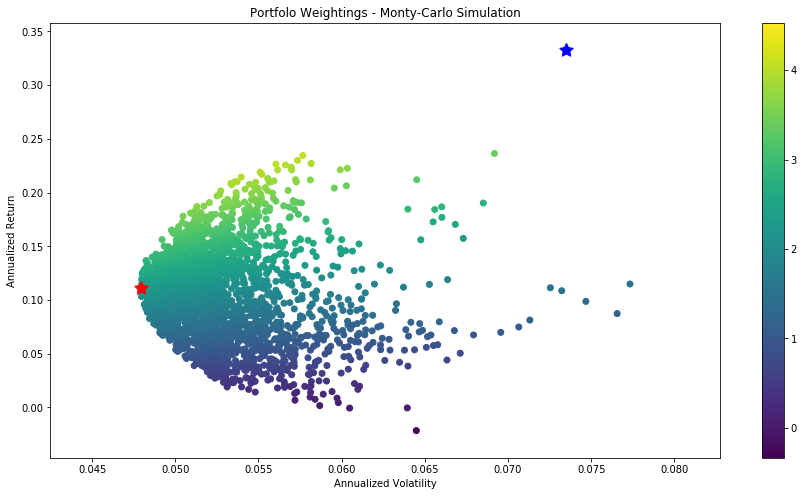

In [15]:
fig,ax = plt.subplots(figsize = (15,8),nrows = 1,ncols = 1)
plt.scatter(scatter_data.volatility, scatter_data.returns, c = scatter_data.sharpe)
plt.title('Portfolo Weightings - Monty-Carlo Simulation')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()
plt.scatter(point_max_sharpe.volatility, point_max_sharpe.returns, marker=(5,1,0), c = 'b', s = 200 )
plt.scatter(point_min_vol.volatility, point_min_vol.returns, marker = (5,1,0), c = 'r', s = 200 )
plt.show()


<h1> MODULE 5 ENDS here, Thank You </h1>